# PROBLEM STATEMENT
### The aim of this assignment is just to explore the dataset for NYC trip duration dataset and generate insights from it.
- id - a unique identifier for each trip
- vendor_id - a code indicating the provider associated with the trip record
- pickup_datetime - date and time when the meter was engaged
- dropoff_datetime - date and time when the meter was disengaged
- passenger_count - the number of passengers in the vehicle (driver entered value)
- pickup_longitude - the longitude where the meter was engaged
- pickup_latitude - the latitude where the meter was engaged
- dropoff_longitude - the longitude where the meter was disengaged
- dropoff_latitude - the latitude where the meter was disengaged
- store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor       because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)
- trip_duration - (target) duration of the trip in seconds

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import warnings; warnings.simplefilter('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('drive/MyDrive/Dataset/nyc_taxi_trip_duration.csv')

In [4]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


In [6]:
unique_counts= df.nunique()
print(unique_counts)

id                    729322
vendor_id                  2
pickup_datetime       709359
dropoff_datetime      709308
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
dtype: int64


In [7]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


# OBSERVATIONS

- The count variables are same as no of rows in our dataset for all the continuous variables which means No Missing Value
- Passengers Count ranges from 0 to 9
- There are 2 unique vendor ids.vendor_Id gives us information about the assigned vendor for each ride
- There are 2 unique values for store_and_fwd_flag, that we also saw in the description of the variables, which are Y and N and   it needs to be changed to category format.
- The pickup_datetime and dropoff_datetime need to be changed into datetime format. Date gives information about Day, Month &     Year.Time stamp gives information about Time of the day.
- passenger_count  tells us number of passenger per rides as input by driver.




In [8]:
df['store_and_fwd_flag']=df['store_and_fwd_flag'].astype('category')

In [9]:
# extracting month,day and hour data from datetime formatted columns i.e both pickUp_datetime and dropOff_datetime:

for i in['pickup','dropoff']:
    df['{}_datetime'.format(i)] = pd.to_datetime(df['{}_datetime'.format(i)])
    df['{}_month'.format(i)] = df['{}_datetime'.format(i)].apply(lambda x:x.month)
    df['{}_day_name'.format(i)] = df['{}_datetime'.format(i)].apply(lambda x:x.day_name())
    df['{}_hour'.format(i)] = df['{}_datetime'.format(i)].apply(lambda x:x.hour)

In [10]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_day_name,pickup_hour,dropoff_month,dropoff_day_name,dropoff_hour
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,2,Monday,16,2,Monday,16
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,3,Friday,23,3,Friday,23
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,2,Sunday,17,2,Sunday,18
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,1,Tuesday,9,1,Tuesday,10
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,2,Wednesday,6,2,Wednesday,6


### we can analyze the pickup_hour and dropoff_hour further by categorizing it into time of the day the trip was scheduled i.e in morning , afternoon,evening and latenight.

In [11]:
def time_of_day(x):         # creating a function time_of_day
    if x in range (6,12):
        return 'Morning'
    elif x in range(12, 16):
        return 'Afternoon'
    elif x in range (16,22):
        return 'Evening'
    else:
        return 'Late night'


In [12]:
df['pickup_timeofday'] = df['pickup_hour'].apply(time_of_day)
df['dropoff_timeofday']= df['dropoff_hour'].apply(time_of_day)

In [13]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_day_name,pickup_hour,dropoff_month,dropoff_day_name,dropoff_hour,pickup_timeofday,dropoff_timeofday
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,2,Monday,16,2,Monday,16,Evening,Evening
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,3,Friday,23,3,Friday,23,Late night,Late night
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,2,Sunday,17,2,Sunday,18,Evening,Evening
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,1,Tuesday,9,1,Tuesday,10,Morning,Morning
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,2,Wednesday,6,2,Wednesday,6,Morning,Morning


### Latitudes and Longitudes are geolocation coordinates.Just the latitudes and longitude won't help in drawing any insights . but wecan use them to calculate distace between pickup and dropoff points. we can import the great circle distance function from the geopy library in Python. The great circle distance is the shortest distance between two points on the surface of a sphere, measured along the surface of the sphere. it takes latitudes and longitudes  of a place and calculates shortest distance between two place.

In [14]:
!pip install geopy
from geopy.distance import great_circle
def distance_Trip (pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude):
    start_coordinates=(pickup_latitude,pickup_longitude)
    stop_coordinates=(dropoff_latitude, dropoff_longitude)
    return great_circle(start_coordinates, stop_coordinates).km

In [15]:
df['distance'] =df.apply(lambda x: distance_Trip(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude']), axis=1)

In [16]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_day_name,pickup_hour,dropoff_month,dropoff_day_name,dropoff_hour,pickup_timeofday,dropoff_timeofday,distance
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,2,Monday,16,2,Monday,16,Evening,Evening,1.199074
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,3,Friday,23,3,Friday,23,Late night,Late night,4.129117
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,2,Sunday,17,2,Sunday,18,Evening,Evening,7.250763
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,1,Tuesday,9,1,Tuesday,10,Morning,Morning,2.361101
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,2,Wednesday,6,2,Wednesday,6,Morning,Morning,4.328540


## UNIVARIATE ANALYSIS

In [17]:
# percentage of trip by vendor
percentage_of_vend_1=round(len(df[df["vendor_id"]==1])/len(df)*100,1)
percentage_of_vend_2=round(len(df[df["vendor_id"]==2])/len(df)*100,1)
total_percentage=[percentage_of_vend_1,percentage_of_vend_2]
total_percentage

[46.5, 53.5]

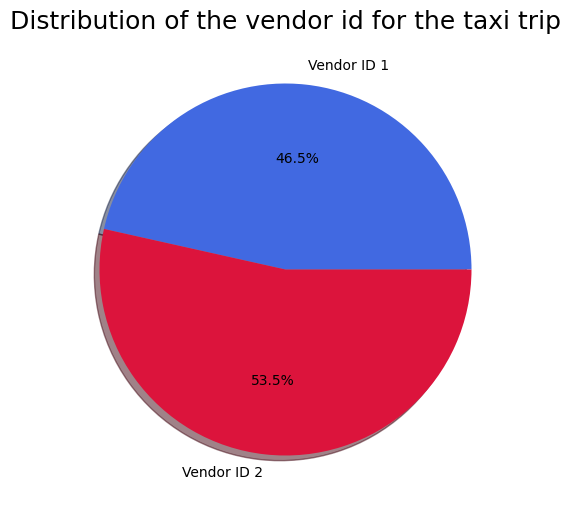

In [18]:
plt.figure(figsize = (6,8))
c=['royalblue','crimson']
plt.pie(total_percentage, labels = ['Vendor ID 1','Vendor ID 2'],autopct='%.1f%%',colors=c,shadow=True)
plt.title('Distribution of the vendor id for the taxi trip',fontsize=18)
plt.show()

###  vendor_id

- There are two unique vendors, ride distribution seems competitive.

- Distribution of rides between vendor 1 & 2 is 46.4 % and 53.5 % respectively.

In [19]:
df["store_and_fwd_flag"].value_counts()

N    725282
Y      4040
Name: store_and_fwd_flag, dtype: int64

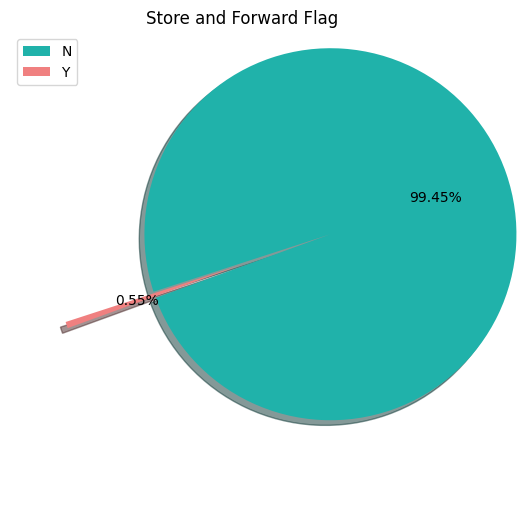

In [20]:
plt.figure(figsize=(6,8))
plt.pie(df['store_and_fwd_flag'].value_counts(), colors=['lightseagreen', 'lightcoral'], shadow=True, explode=[0.5,0], autopct='%1.2f%%', startangle=200)
plt.legend(labels=['N','Y'])
plt.title("Store and Forward Flag");

#### From the above pie cart we infer that 99.45% of times the trip was not recorded in the server

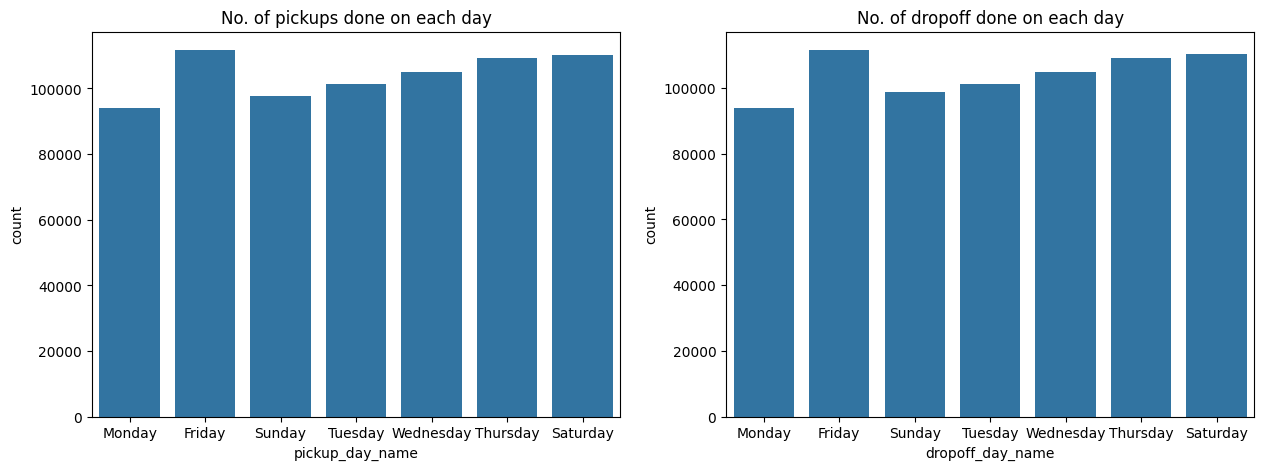

In [21]:
##Number of Pickups and Dropoff on each day of the week
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.countplot(x="pickup_day_name",data=df,ax=ax[0])
ax[0].set_title('No. of pickups done on each day')
sns.countplot(x="dropoff_day_name",data=df,ax=ax[1])
ax[1].set_title('No. of dropoff done on each day')
plt.show()

### Friday seems to be the busiest day in a week

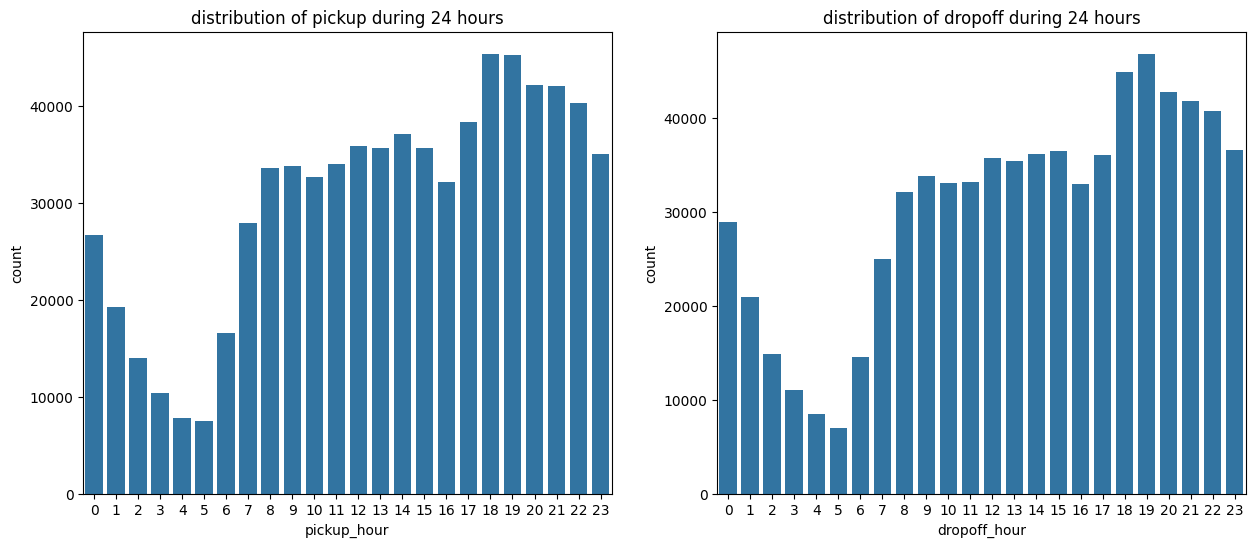

In [22]:

figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(15,6))
ax9.set_title('distribution of pickup during 24 hours')
ax=sns.countplot(x="pickup_hour",data=df,ax=ax9)
ax10.set_title('distribution of dropoff during 24 hours')
ax=sns.countplot(x="dropoff_hour",data=df,ax=ax10)

### Highest number of rides are taken in the Evening which is between 16:00 hrs to 22:00 hrs and least number of rides are taken before dawn which is between 00:00 hrs to 07:00 hrs.

- Distribution of pickup and dropoff hours follows same pattern, it shows that most of the pickups and dropoffs are in the evening. We can see that people often use taxi services to get to their workplaces in the mornings after 10:00 AM. and busiet time is 6PM to 7PM.

In [23]:
# Frequency of Passenger counts
df.passenger_count.value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: passenger_count, dtype: int64

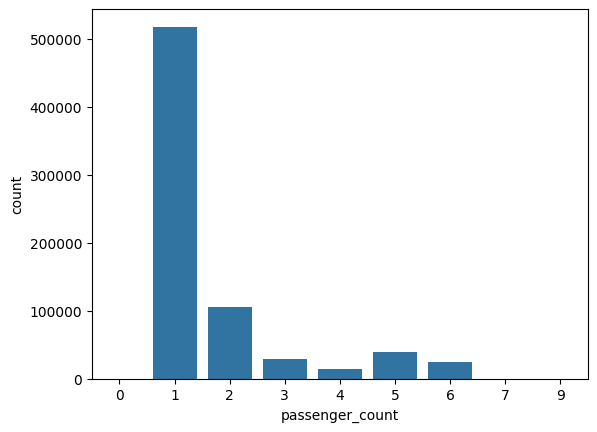

In [24]:
sns.countplot(x='passenger_count',data=df);

#### the highest amount of trips are with only single passengers

In [25]:
# Numerical datatypes

df.select_dtypes(include=['int64','float64','Int64']).dtypes

vendor_id              int64
passenger_count        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
trip_duration          int64
pickup_month           int64
pickup_hour            int64
dropoff_month          int64
dropoff_hour           int64
distance             float64
dtype: object

In [26]:
numerical_features = ["trip_duration" , "pickup_hour" , "dropoff_hour","distance"]

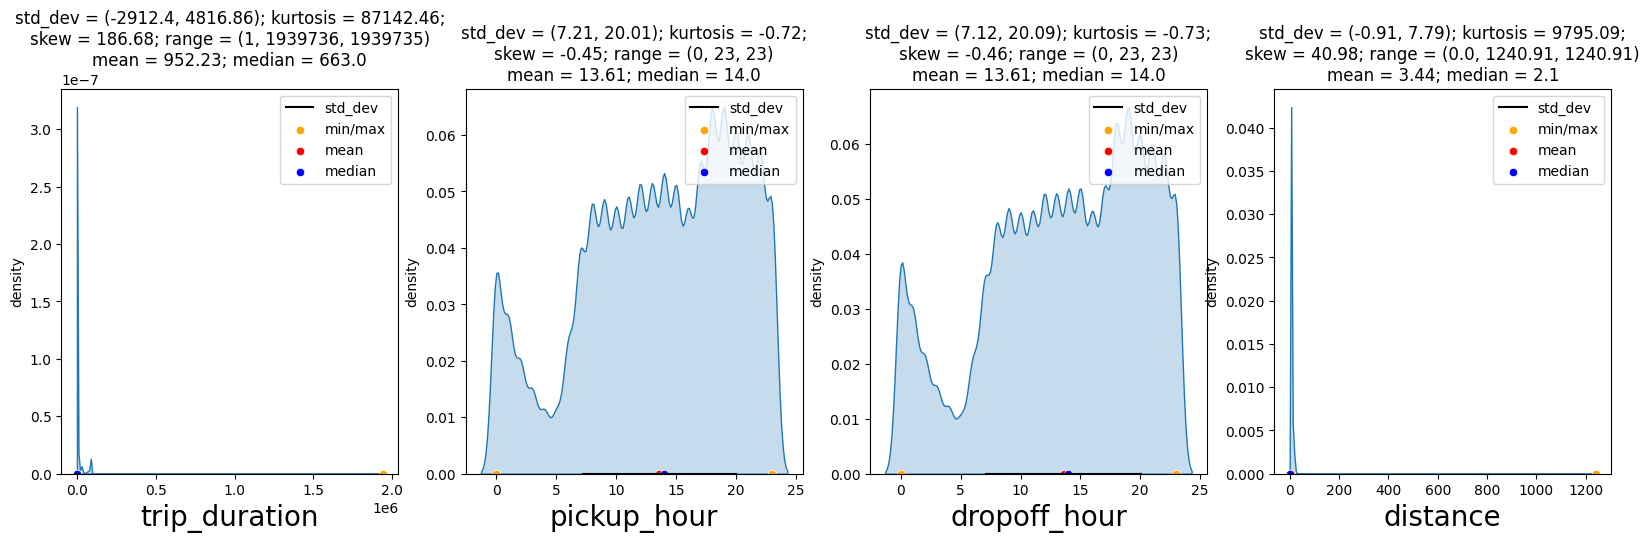

In [27]:
# using a custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(df, var_group):


  size = len(var_group)
  plt.figure(figsize = (20,5))

  #looping for each variable
  for j,i in enumerate(var_group):

    # calculating descriptives of variable
    mini = df[i].min()
    maxi = df[i].max()
    ran = df[i].max()-df[i].min()
    mean = df[i].mean()
    median = df[i].median()
    st_dev = df[i].std()
    skew = df[i].skew()
    kurt = df[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(df[i], shade=True)
    sns.lineplot(x=points, y=[0] * len(points), color='black', label="std_dev")
    sns.scatterplot(x=[mini,maxi], y=[0,0], color = 'orange', label = "min/max")
    sns.scatterplot(x=[mean], y=[0], color = 'red', label = "mean")
    sns.scatterplot(x=[median], y=[0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))
UVA_numeric(df , numerical_features)

### summary of trip_duration
- Mean, average time spend in a ride is 952.23 seconds ~ 15 minutes.
- The trip_duration goes very high upto 538 hrs, this may suggest customer engage/book rides for more
  than a day too.
- Std Dev of first order is at -2912.4 or 49 min.
- Skewness = 186.68 which shows extreme right skewness, unsymmetry towards right side.
- kurtosis = 87142.46, which suggest heavy tailed or extreme outliers.

### summary of pickup_hour
- mean/average pickup_hour is at 14:00 hrs.
- First Std Deviation of 7:21 hr suggest a plateau like distribution around mean,
- Skewness = -0.45 shows left skewness of data.
- Kurtosis = -0.72 which suggest light tailed or very less outliers being present.

### summary of dropoff_hour
- mean/average dropoff_hour is at 14:00 hrs.
- First Std Deviation of 7:21 hr suggest a plateau like distribution around mean
- Skewness = -0.46 shows left skewness of data.
- Kurtosis = -0.73 which suggest light tailed or very less outliers being present
### summary of distance
- mean is 3.44 km and median is 2.1 km
- first std_deviation is of 0.910 km
- skew is 40.98 and kurtosis is 9795.09 signalling positive skewness and heavy and extreme outliers being present

# BIVARIATE ANALYSIS

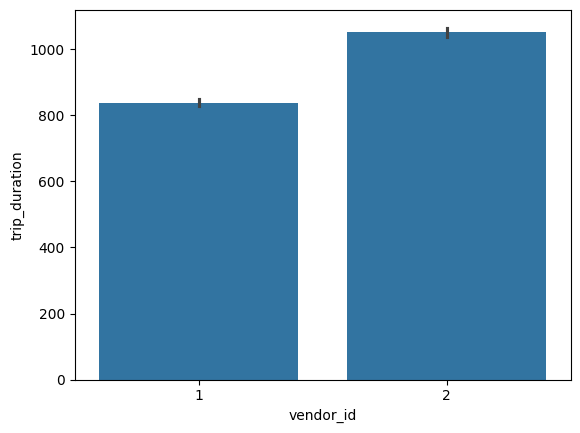

In [28]:
# trip duration per vendor id
sns.barplot(y='trip_duration',x='vendor_id',data=df,estimator=np.mean);

<function matplotlib.pyplot.show(close=None, block=None)>

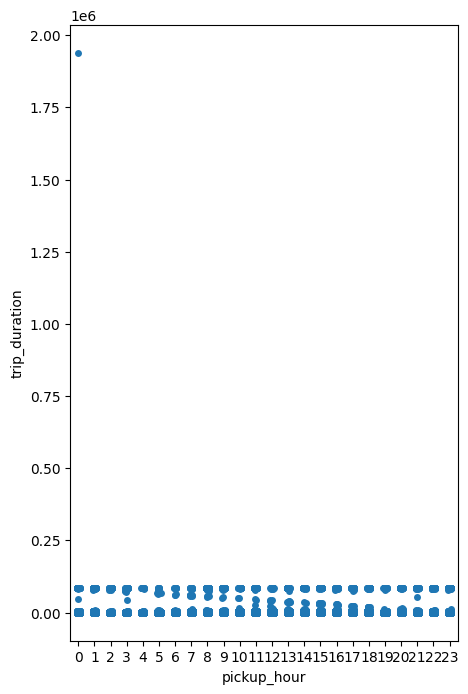

In [29]:
plt.figure(figsize=(5, 8))
sns.stripplot(x='pickup_hour',y='trip_duration', data=df)


plt.show

There is an obvious outlier with a very long trip duration

<function matplotlib.pyplot.show(close=None, block=None)>

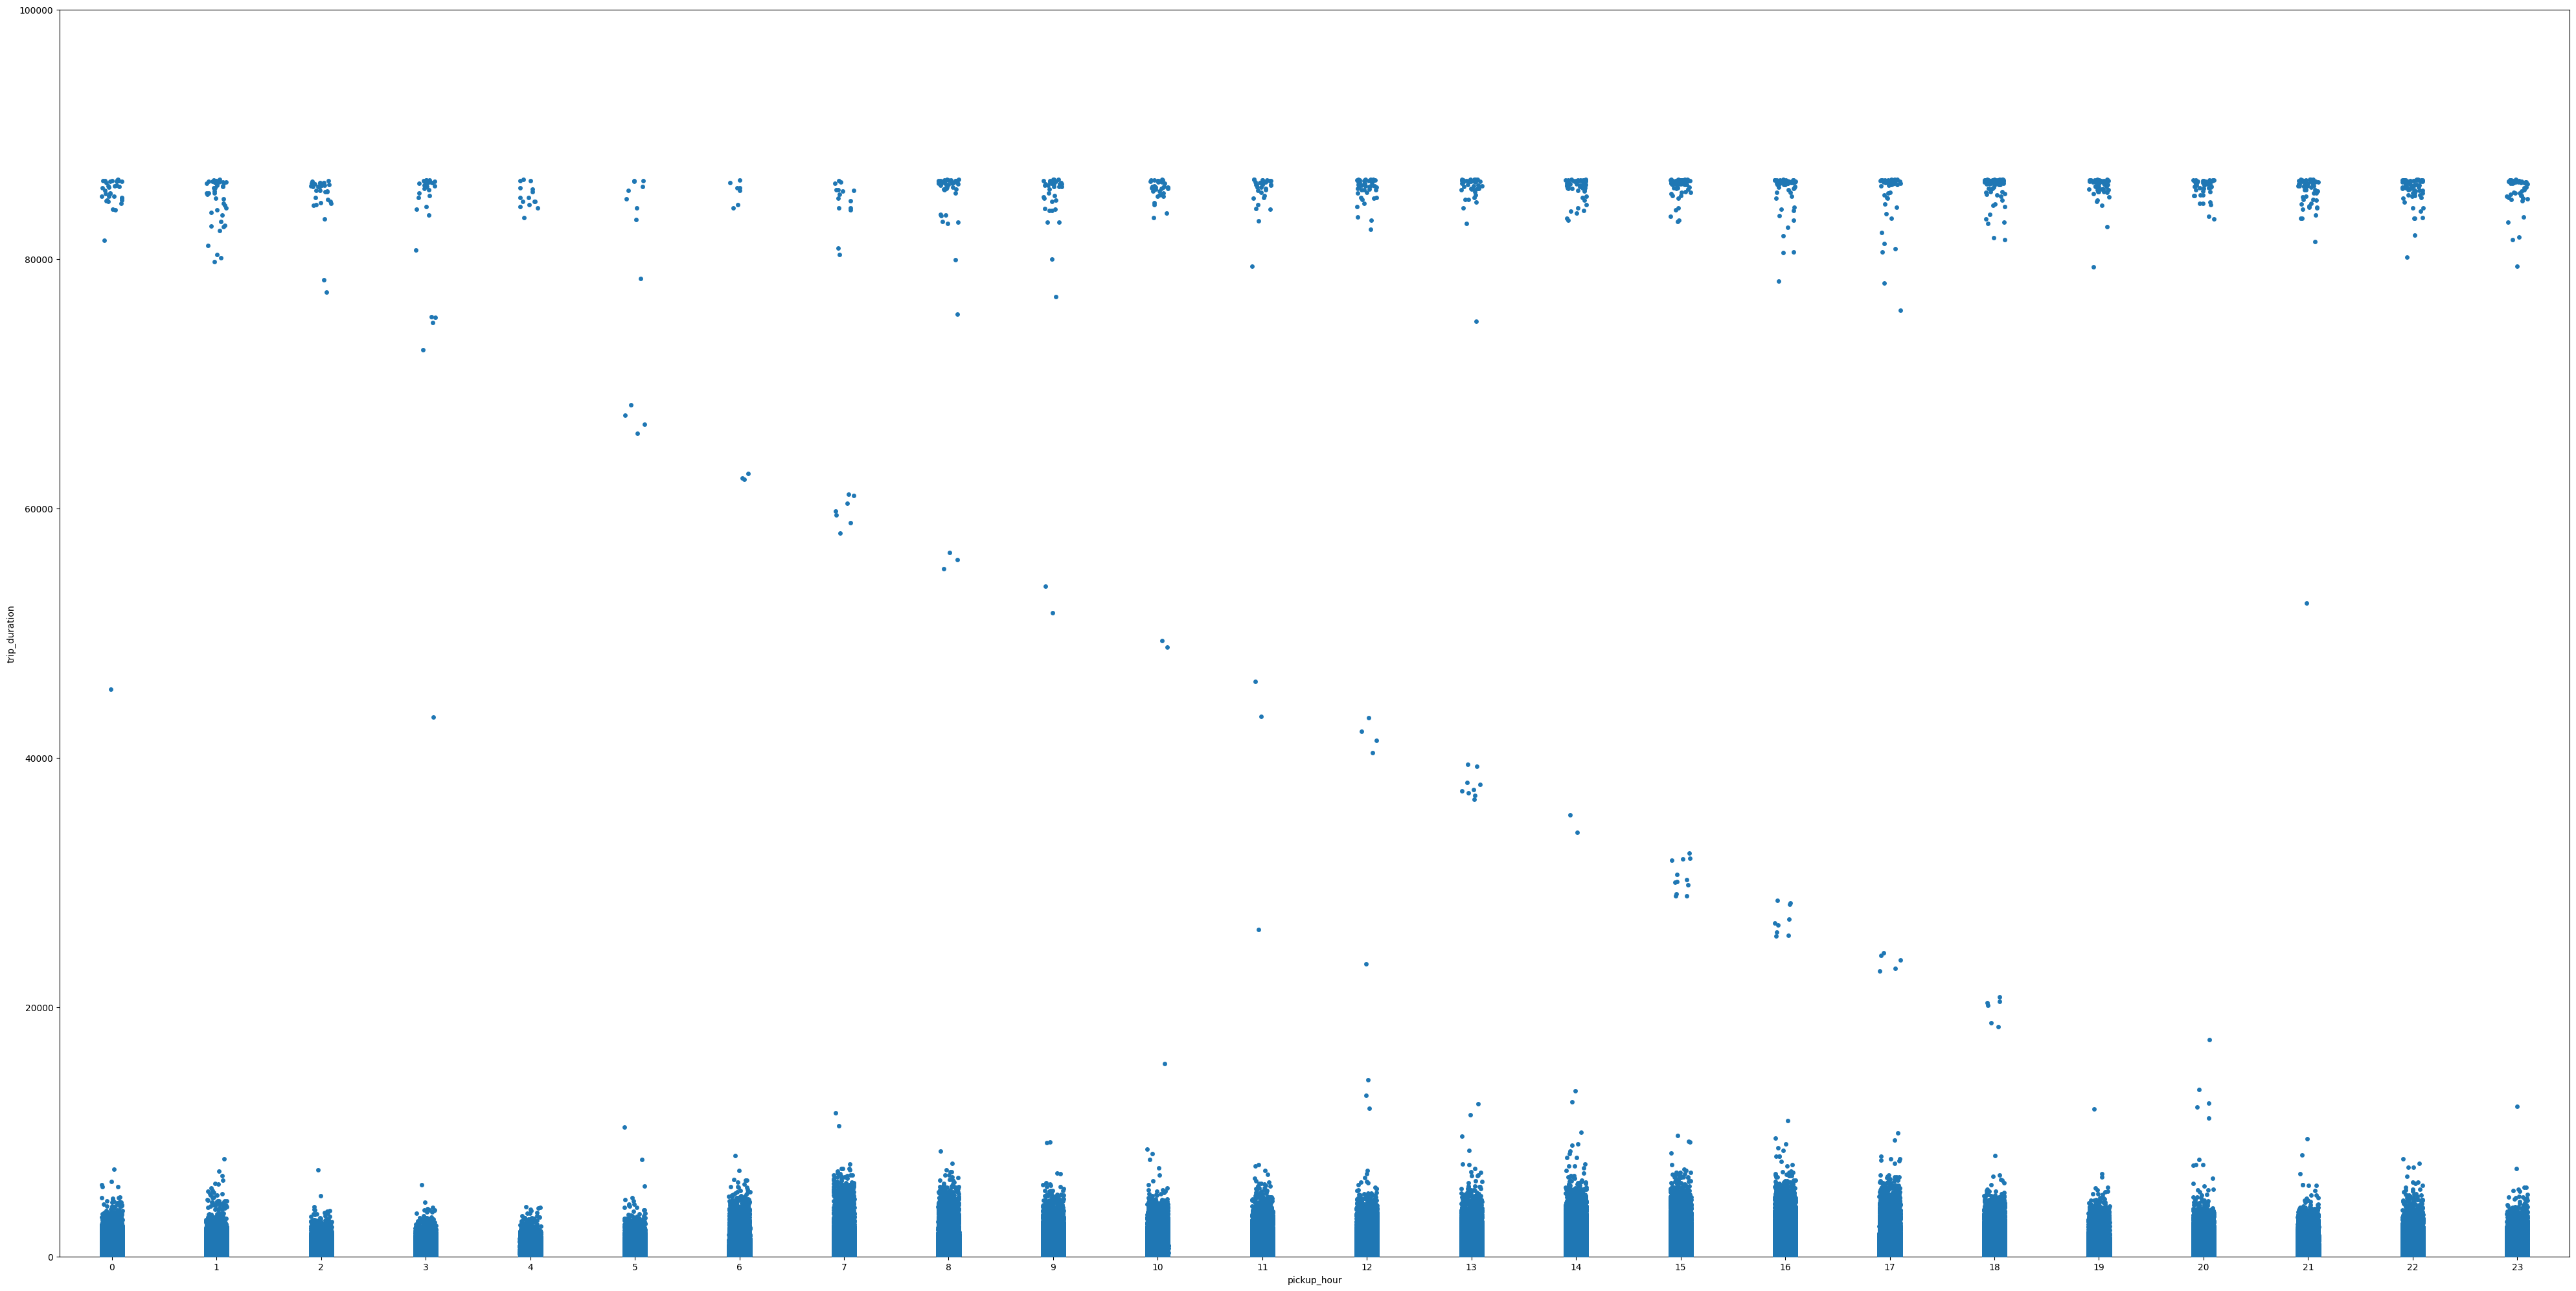

In [30]:
plt.figure(figsize=(50, 25))
sns.stripplot(x='pickup_hour',y='trip_duration', data=df)
plt.ylim(0, 100000)

plt.show

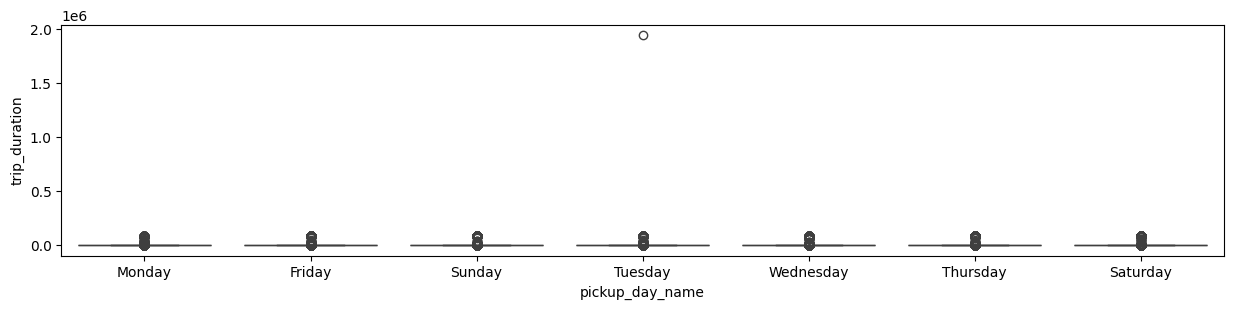

In [31]:
plt.figure(figsize = (15,3))
sns.boxplot(x="pickup_day_name", y="trip_duration",data=df)

plt.show()

#### Summary
- Average trip_duration is higher on Thursday and Friday than other days.

- We see error bars at top of each bar which on plotting boxplot reveals Tueday's trip has extreme outliers.

- Boxplot also reveals that most trip_durations among the data are concentrated below 10000 seconds or less than 3 hours.

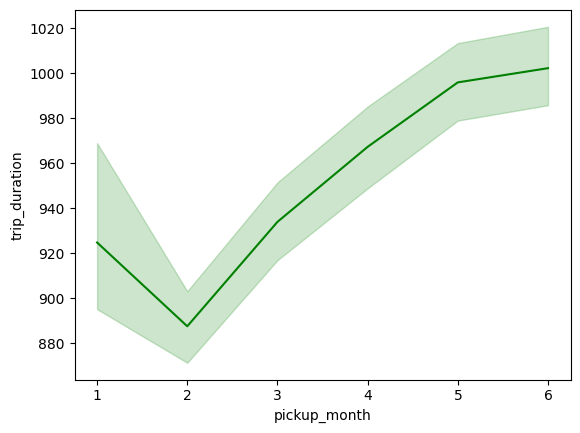

In [32]:
#Trip Duration by the month.
sns.lineplot(x='pickup_month',y='trip_duration',data=df,color='green')
plt.show()

- from february we can see the rise in trip duration

In [33]:
#aggegate vendor id by pickup month
monthly_pickup_by_vendor=df.groupby(["pickup_month","vendor_id"]).size()
monthly_pickup_by_vendor = monthly_pickup_by_vendor.unstack()


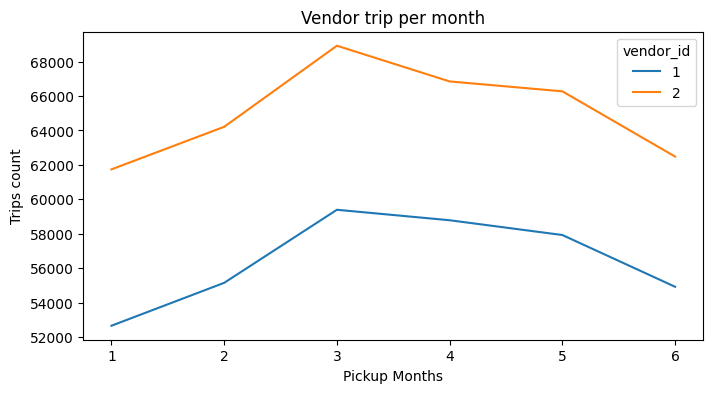

In [34]:
monthly_pickup_by_vendor.plot(kind = 'line', figsize = (8,4))
plt.title('Vendor trip per month')
plt.xlabel('Pickup Months')
plt.ylabel('Trips count')
plt.show()

- We can see that both vendors' trips are at their maximum in the month of March and their lowest in the month of January, February and  June.

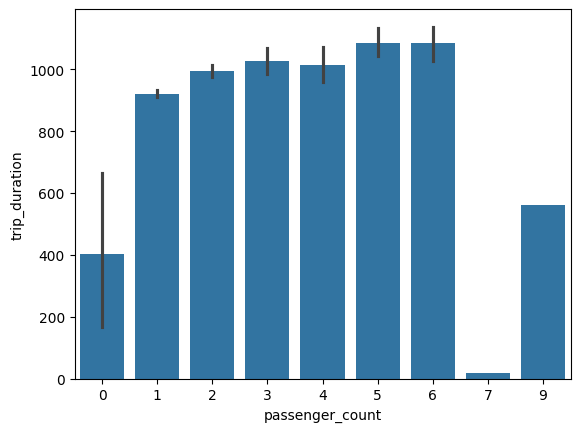

In [35]:
sns.barplot(x='passenger_count',y='trip_duration',data=df);

- most passengers travelled for 1000 seconds and some may have cancelled after booking that is why there is a column for 0 second

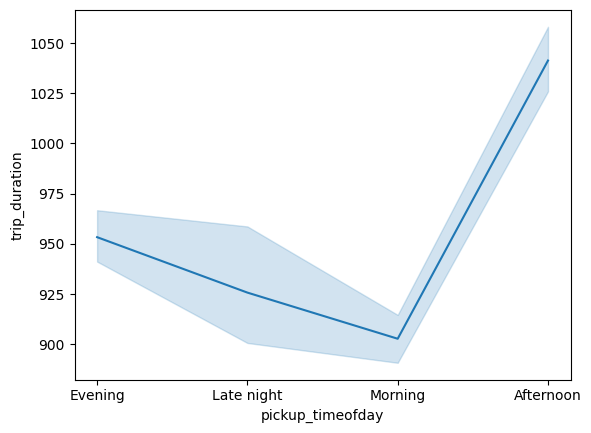

In [36]:
sns.lineplot(x='pickup_timeofday', y='trip_duration', data=df);

- Trip duration  increases from morning and peaked at afternoon .The average trip duration in evening is 950 seconds i.e 15 minutes

In [37]:
df['average_speed']= df['distance']/(df['trip_duration']/3600)
df['average_speed'].head()

0    10.791669
1    13.513473
2    15.964983
3     7.449573
4    18.375877
Name: average_speed, dtype: float64

# MULTIVARIATE ANALYSIS

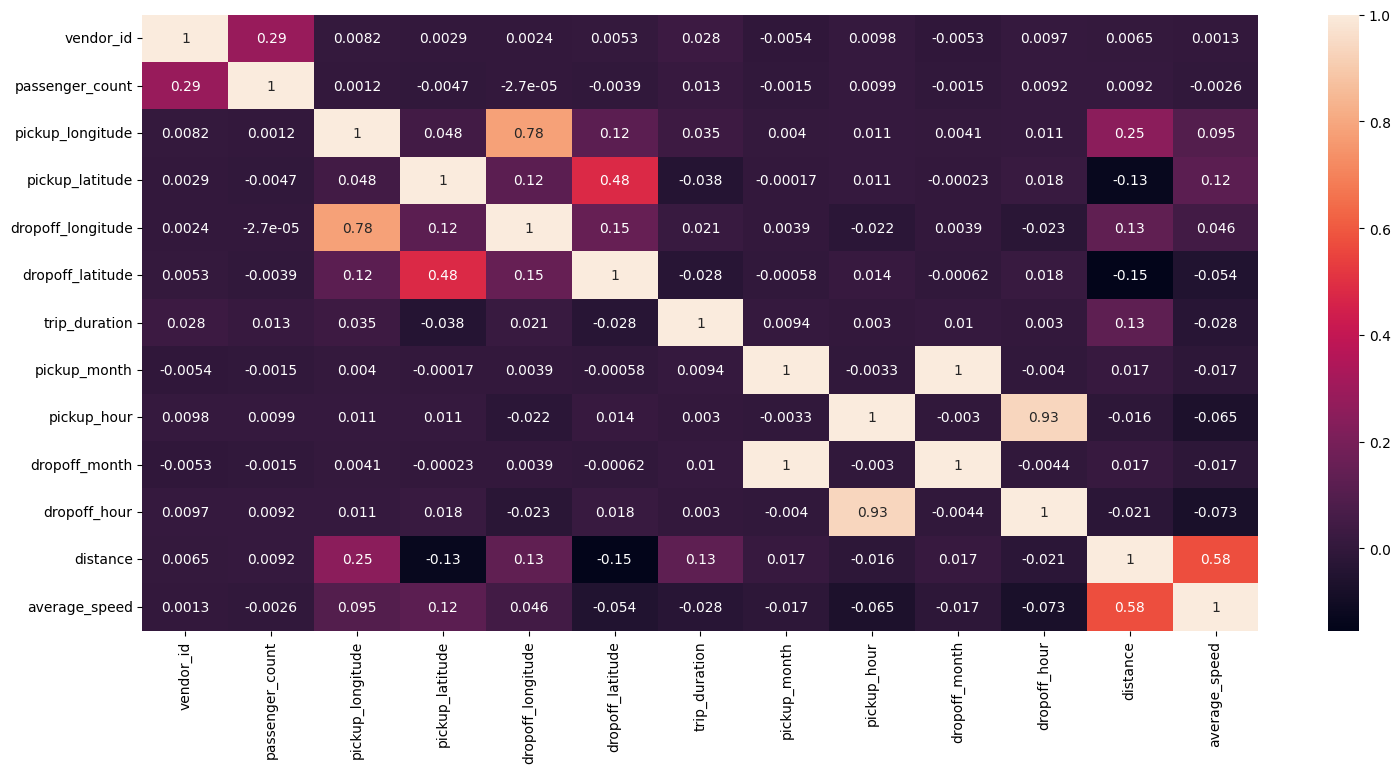

In [38]:
plt.figure(figsize=(18,8))
correlation=df.corr()
sns.heatmap(correlation,annot=True)
plt.show()

- pickup_month and dropp off month is 100% correlated.Along with pickup hour ,dropoff hour are highly correlated and average     speed and distance are moderately correlated

In [39]:
#Checking numerical datatypes of the dataset
numerical = df.select_dtypes(include=['int64', 'float64', 'Int64'])[:]
numerical.dtypes

vendor_id              int64
passenger_count        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
trip_duration          int64
pickup_month           int64
pickup_hour            int64
dropoff_month          int64
dropoff_hour           int64
distance             float64
average_speed        float64
dtype: object

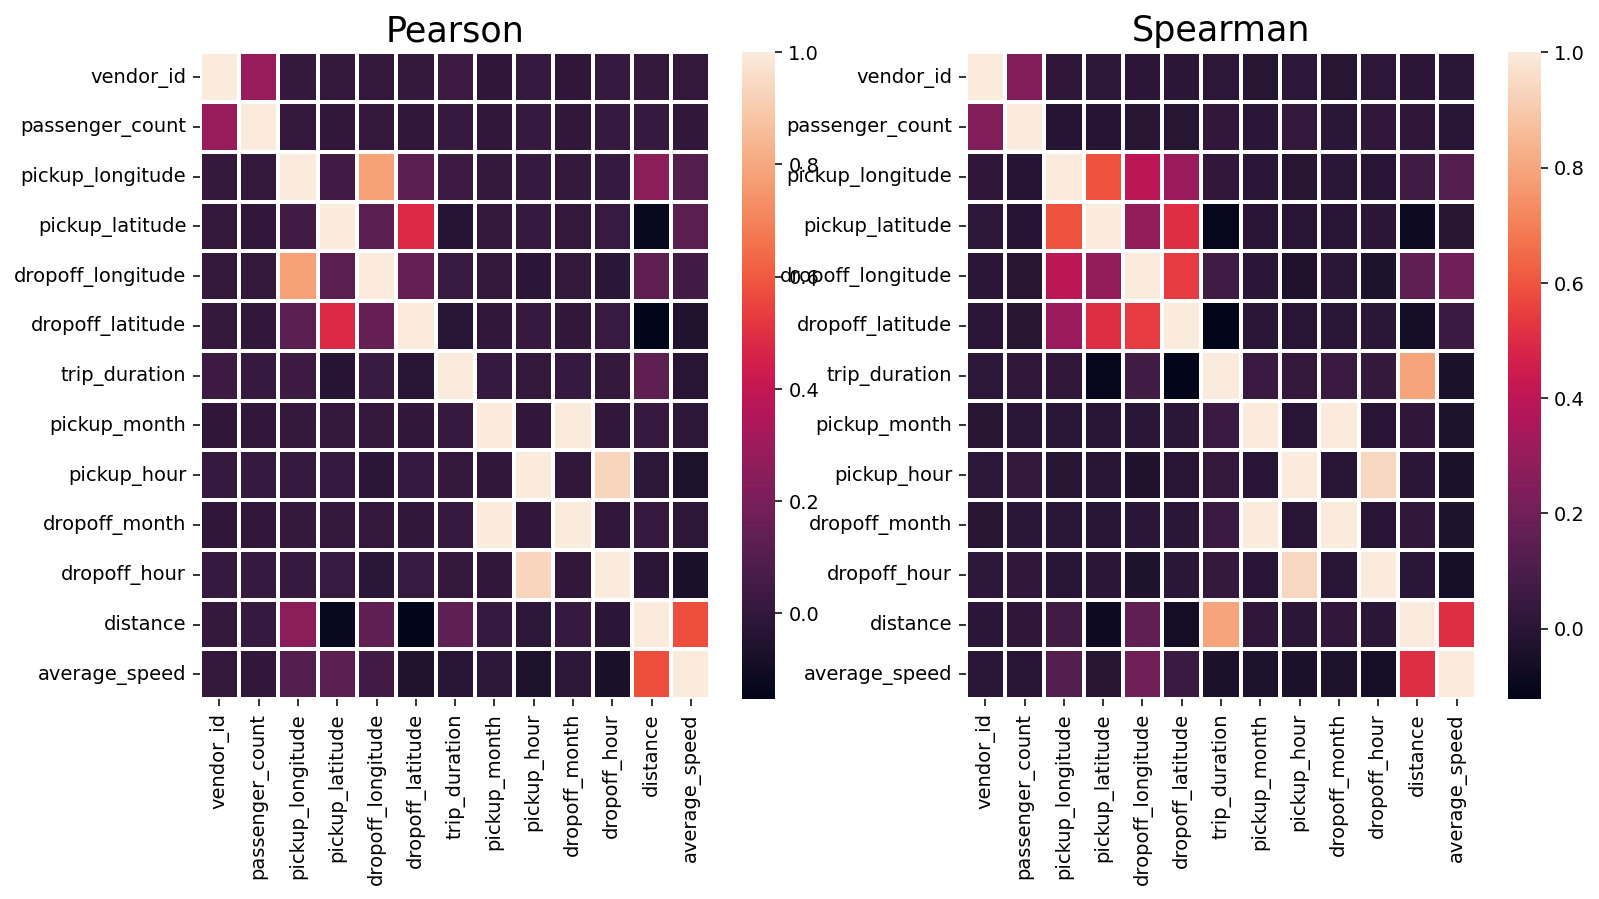

In [42]:
plt.figure(figsize=(20, 6), dpi=140)

methods = ['pearson', 'spearman']
for j, method in enumerate(methods):
    plt.subplot(1, 3, j+1)
    correlation = numerical.dropna().corr(method=method)
    sns.heatmap(correlation, linewidths=2)
    plt.title(method.capitalize(), fontsize=18)

plt.show()

- Kendall,& Spearman correlation seem to have very similar pattern between them, except the slight variation in magnitude of correlation.
* Too many variables with insignificant correlation.
* Major correlation lies between the drop off hour and pickup hour.

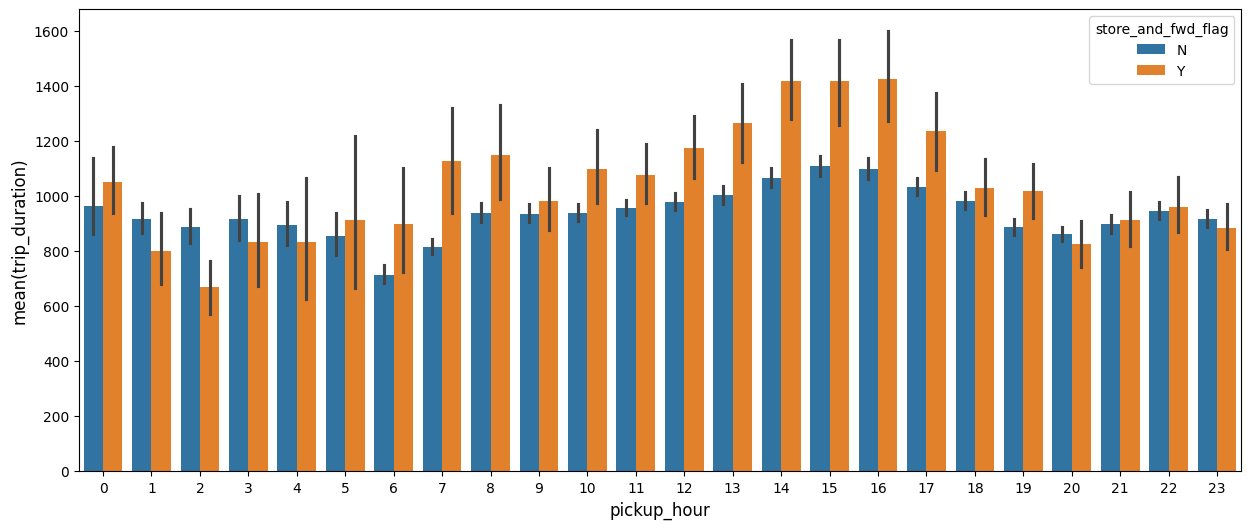

In [41]:
plt.figure(figsize=(15, 6))
sns.barplot(x='pickup_hour', y='trip_duration', data=df, hue='store_and_fwd_flag')
plt.xlabel('pickup_hour',fontsize=12)
plt.ylabel('mean(trip_duration)',fontsize=12)
plt.show()
